In [5]:
import tensorflow as tf

### CNN MODEL:

In [2]:
cnn = tf.keras.models.Sequential()

In [3]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size = 3,activation = 'relu',input_shape = [224,224,3]))

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size = 3,activation = 'relu'))

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2))

In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size = 3,activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #binary classification

#### Compiling:

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0

#### TRAINING:

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
#Image augmentation: (with help of ImageDataGenerator)
train_datagen = ImageDataGenerator(
        rescale=1./255, #normalization
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #only rescaling.

- We already made a folder named **train** and **val** both containing COVID AND NORMAL CLASSES
- With the code below, TF automatically detects these.

In [17]:
training_set = train_datagen.flow_from_directory( #resizing for less computations.
        'dataset/train',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary') 


Found 320 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory(
        'dataset/val',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

Found 70 images belonging to 2 classes.


In [20]:
training_set.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
test_set.class_indices

{'Covid': 0, 'Normal': 1}

In [22]:
hist = cnn.fit_generator(training_set,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = test_set,
    validation_steps=2)

C:\Users\omkar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 118s 15s/step - loss: 0.9374 - accuracy: 0.4492 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 126s 16s/step - loss: 0.6440 - accuracy: 0.6562 - val_loss: 0.5820 - val_accuracy: 0.7344
Epoch 3/10
8/8 [==============================] - 122s 15s/step - loss: 0.4437 - accuracy: 0.8125 - val_loss: 0.2154 - val_accuracy: 0.9688
Epoch 4/10
8/8 [==============================] - 116s 14s/step - loss: 0.4738 - accuracy: 0.7734 - val_loss: 0.6090 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 126s 16s/step - loss: 0.4946 - accuracy: 0.8438 - val_loss: 0.3645 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 120s 15s/step - loss: 0.3575 - accuracy: 0.8359 - val_loss: 0.2692 - val_accuracy: 0.9062
Epoch 7/10
8/8 [==============================] - 123s 15s/step - loss: 0.2620 - accuracy: 0.9023 - val_loss: 0.1808 - val_accuracy: 0.9688
Epoch 8/10
8/8 [====

In [23]:

#Getting summary
summary=hist.history
print(summary)

{'loss': [0.9374009966850281, 0.6440168023109436, 0.4437114894390106, 0.4737893044948578, 0.4945765733718872, 0.35751503705978394, 0.2620323598384857, 0.22423577308654785, 0.2081843912601471, 0.19132763147354126], 'accuracy': [0.44921875, 0.65625, 0.8125, 0.7734375, 0.84375, 0.8359375, 0.90234375, 0.90625, 0.93359375, 0.96484375], 'val_loss': [0.6897846460342407, 0.5820274949073792, 0.2153938114643097, 0.6089673638343811, 0.3645278215408325, 0.2692468762397766, 0.18080787360668182, 0.15261361002922058, 0.17235067486763, 0.03443322703242302], 'val_accuracy': [0.5, 0.734375, 0.96875, 1.0, 1.0, 0.90625, 0.96875, 0.96875, 0.984375, 1.0]}


In [25]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


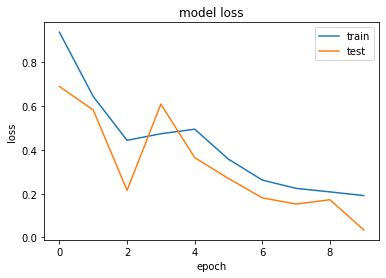

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

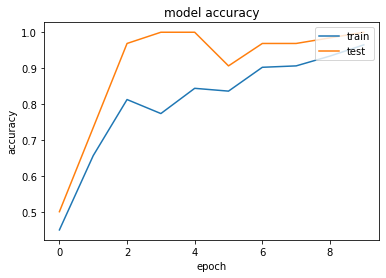

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [2]:
cnn.save("model_covid.h5")

NameError: name 'cnn' is not defined

In [34]:
cnn.evaluate_generator(training_set)

C:\Users\omkar\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.09818506240844727, 0.9750000238418579]

In [1]:
print(cnn.evaluate_generator(test_set))

NameError: name 'cnn' is not defined

### Loading a saved model:

In [8]:
from tensorflow.keras.models import load_model

In [9]:
model = load_model('model_covid.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 218, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 109, 109, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 107, 107, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0